/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


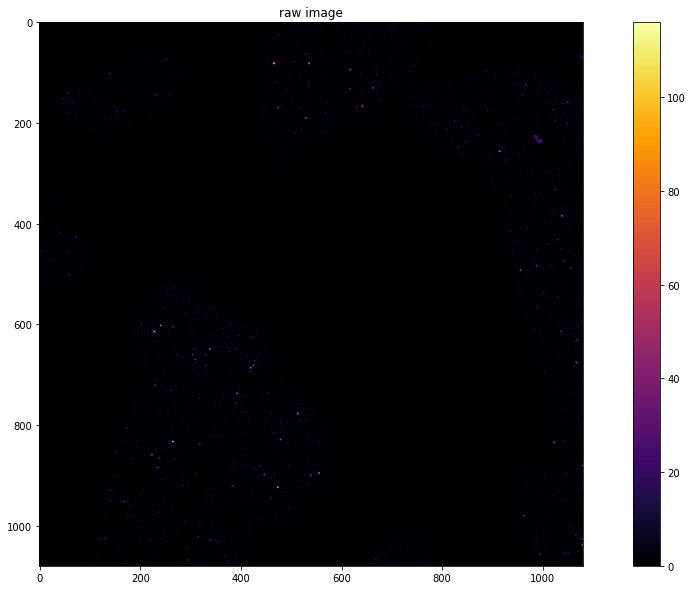

In [20]:
%matplotlib inline
from Image.image import *

im_path = '/Users/remydubois/Desktop/Remy/_REMY/Opera_Conf/3D/B09_DYNC1H1/r02c09f02-ch1sk1fk1fl1.tif'

im = FQimage()
im.load(im_path)
im.show_image()

In [22]:
from scipy.ndimage.filters import gaussian_filter

raw = im.image_raw.copy()

####################################
# Get the spots
sigmas_list = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
gaussian_images = [gaussian_filter(raw, [s, ] * (raw.ndim - 1) + [s * raw.shape[-1] / max(raw.shape[-1:])]) for
                   s in sigmas_list]
dog_images = [(gaussian_images[i] - gaussian_images[i + 1])
              * sigmas_list[i] for i in range(len(sigmas_list) - 1)]
image_cube = numpy.stack(dog_images, axis=-1)
local_maxima = peak_local_max(image_cube, threshold_abs=numpy.percentile(raw.ravel(), 0),
                              footprint=numpy.ones((3, 3, 3, len(sigmas_list))),
                              exclude_border=False)


50.79853701591492
1.16
14194


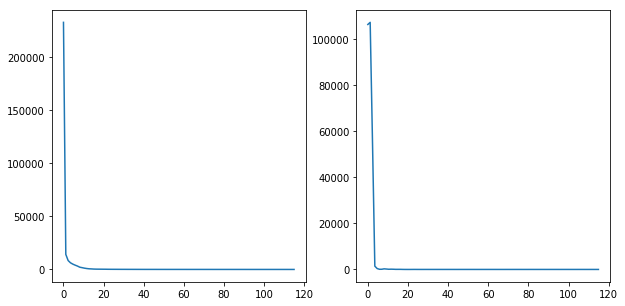

In [25]:
####################################
# Sort it
s = time.time()
intensities = [raw[tuple(s)] for s in local_maxima[:, :3]]
intensities = sorted(intensities)
xs = [i*max(intensities)/100 for i in range(100)]
counts = [sum(1 for _ in filter(lambda x: x > f, intensities)) for f in xs]
f, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax = ax.ravel()
ax[0].plot(xs, counts)
ax[1].plot(xs, numpy.gradient(numpy.gradient(counts)))
f.show(0)

ind = numpy.argmax(numpy.gradient(numpy.gradient(counts)))
print(time.time()-s)
print(xs[ind])
print(counts[ind])

In [4]:
def adjust_and_filter(blobs_array, image):
    spots = blobs_array[:, :3].copy().astype(int)
    intensities = [image[tuple(s)] for s in spots]
    sorted_intensities = sorted(intensities)
    xs = [i * max(sorted_intensities) / 100 for i in range(100)]
    counts = [sum(1 for _ in filter(lambda x: x > f, sorted_intensities)) for f in xs]
    hess = numpy.gradient(numpy.gradient(counts))
    ind = numpy.argmax(hess)
    thresh = xs[ind]
    f = filter(lambda t: t[0] > thresh, zip(intensities, blobs_array))
    return numpy.stack(list(zip(*f))[1])

out = adjust_and_filter(local_maxima, raw)
print(out)
print(out.shape)

[[1079  773   15    0]
 [1079  771   16    3]
 [1079  771   15    3]
 ...
 [   0  709   17    1]
 [   0  709   15    2]
 [   0  709   14    2]]
(14194, 4)



Detecting...

314 spots detected.

Fitting...

fit.


/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


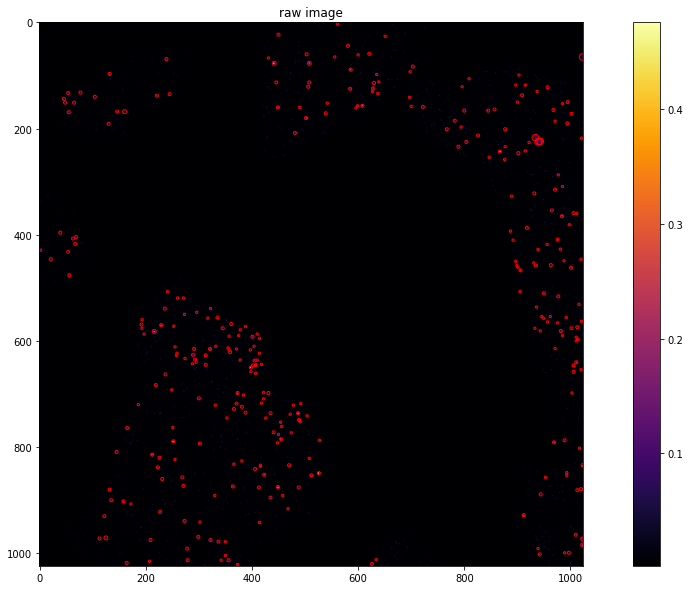

In [8]:
im.detect_and_fit(min_sigma=0.5, max_sigma=3.5, sigma_ratio=1.3)
im.show_spots()

In [12]:
im.compute_snr()
print('\n', im.SNR)

Computing SNRs for each spot:   0%|          | 0/292 [00:00<?, ?it/s]

Computing SNRs for each spot:   0%|          | 1/292 [00:00<03:56,  1.23it/s]

Computing SNRs for each spot:   1%|          | 2/292 [00:01<03:47,  1.27it/s]

Computing SNRs for each spot:   1%|          | 3/292 [00:02<03:58,  1.21it/s]

Computing SNRs for each spot:   1%|▏         | 4/292 [00:03<03:52,  1.24it/s]

Computing SNRs for each spot:   2%|▏         | 5/292 [00:04<03:53,  1.23it/s]

Computing SNRs for each spot:   2%|▏         | 6/292 [00:04<03:56,  1.21it/s]

Computing SNRs for each spot:   2%|▏         | 7/292 [00:05<03:59,  1.19it/s]

Computing SNRs for each spot:   3%|▎         | 8/292 [00:06<04:03,  1.17it/s]

Computing SNRs for each spot:   3%|▎         | 9/292 [00:07<04:02,  1.17it/s]

Computing SNRs for each spot:   3%|▎         | 10/292 [00:08<03:56,  1.19it/s]

Computing SNRs for each spot:   4%|▍         | 11/292 [00:09<03:53,  1.20it/s]

Computing SNRs for each spot:   4%|▍         | 12/292 [00:09<03:50,  1.22it/s]

Computing SNRs for each spot:   4%|▍         | 13/292 [00:10<03:46,  1.23it/s]

Computing SNRs for each spot:   5%|▍         | 14/292 [00:11<03:43,  1.25it/s]

Computing SNRs for each spot:   5%|▌         | 15/292 [00:11<03:39,  1.26it/s]

Computing SNRs for each spot:   5%|▌         | 16/292 [00:12<03:37,  1.27it/s]

Computing SNRs for each spot:   6%|▌         | 17/292 [00:13<03:35,  1.28it/s]

Computing SNRs for each spot:   6%|▌         | 18/292 [00:13<03:32,  1.29it/s]

Computing SNRs for each spot:   7%|▋         | 19/292 [00:14<03:33,  1.28it/s]

Computing SNRs for each spot:   7%|▋         | 20/292 [00:15<03:31,  1.29it/s]

Computing SNRs for each spot:   7%|▋         | 21/292 [00:16<03:33,  1.27it/s]

Computing SNRs for each spot:   8%|▊         | 22/292 [00:17<03:37,  1.24it/s]

Computing SNRs for each spot:   8%|▊         | 23/292 [00:19<03:44,  1.20it/s]

Computing SNRs for each spot:   8%|▊         | 24/292 [00:20<03:47,  1.18it/s]

Computing SNRs for each spot:   9%|▊         | 25/292 [00:21<03:46,  1.18it/s]

Computing SNRs for each spot:   9%|▉         | 26/292 [00:21<03:44,  1.18it/s]

Computing SNRs for each spot:   9%|▉         | 27/292 [00:22<03:43,  1.18it/s]

Computing SNRs for each spot:  10%|▉         | 28/292 [00:23<03:41,  1.19it/s]

Computing SNRs for each spot:  10%|▉         | 29/292 [00:24<03:39,  1.20it/s]

Computing SNRs for each spot:  10%|█         | 30/292 [00:24<03:37,  1.20it/s]

Computing SNRs for each spot:  11%|█         | 31/292 [00:25<03:35,  1.21it/s]

Computing SNRs for each spot:  11%|█         | 32/292 [00:26<03:34,  1.21it/s]

Computing SNRs for each spot:  11%|█▏        | 33/292 [00:27<03:32,  1.22it/s]

Computing SNRs for each spot:  12%|█▏        | 34/292 [00:27<03:30,  1.22it/s]

Computing SNRs for each spot:  12%|█▏        | 35/292 [00:28<03:28,  1.23it/s]

Computing SNRs for each spot:  12%|█▏        | 36/292 [00:29<03:26,  1.24it/s]

Computing SNRs for each spot:  13%|█▎        | 37/292 [00:29<03:25,  1.24it/s]

Computing SNRs for each spot:  13%|█▎        | 38/292 [00:30<03:23,  1.25it/s]

Computing SNRs for each spot:  13%|█▎        | 39/292 [00:31<03:22,  1.25it/s]

Computing SNRs for each spot:  14%|█▎        | 40/292 [00:31<03:20,  1.25it/s]

Computing SNRs for each spot:  14%|█▍        | 41/292 [00:32<03:19,  1.26it/s]

Computing SNRs for each spot:  14%|█▍        | 42/292 [00:33<03:17,  1.26it/s]

Computing SNRs for each spot:  15%|█▍        | 43/292 [00:33<03:16,  1.27it/s]

Computing SNRs for each spot:  15%|█▌        | 44/292 [00:34<03:14,  1.27it/s]

Computing SNRs for each spot:  15%|█▌        | 45/292 [00:35<03:13,  1.27it/s]

Computing SNRs for each spot:  16%|█▌        | 46/292 [00:36<03:14,  1.27it/s]

Computing SNRs for each spot:  16%|█▌        | 47/292 [00:37<03:14,  1.26it/s]

Computing SNRs for each spot:  16%|█▋        | 48/292 [00:38<03:13,  1.26it/s]

Computing SNRs for each spot:  17%|█▋        | 49/292 [00:38<03:12,  1.26it/s]

Computing SNRs for each spot:  17%|█▋        | 50/292 [00:39<03:11,  1.26it/s]

Computing SNRs for each spot:  17%|█▋        | 51/292 [00:40<03:10,  1.27it/s]

Computing SNRs for each spot:  18%|█▊        | 52/292 [00:41<03:09,  1.27it/s]

Computing SNRs for each spot:  18%|█▊        | 53/292 [00:41<03:08,  1.27it/s]

Computing SNRs for each spot:  18%|█▊        | 54/292 [00:42<03:06,  1.27it/s]

Computing SNRs for each spot:  19%|█▉        | 55/292 [00:43<03:05,  1.28it/s]

Computing SNRs for each spot:  19%|█▉        | 56/292 [00:43<03:04,  1.28it/s]

Computing SNRs for each spot:  20%|█▉        | 57/292 [00:44<03:03,  1.28it/s]

Computing SNRs for each spot:  20%|█▉        | 58/292 [00:45<03:02,  1.29it/s]

Computing SNRs for each spot:  20%|██        | 59/292 [00:45<03:00,  1.29it/s]

Computing SNRs for each spot:  21%|██        | 60/292 [00:46<02:59,  1.29it/s]

Computing SNRs for each spot:  21%|██        | 61/292 [00:47<02:58,  1.29it/s]

Computing SNRs for each spot:  21%|██        | 62/292 [00:48<02:58,  1.29it/s]

Computing SNRs for each spot:  22%|██▏       | 63/292 [00:48<02:57,  1.29it/s]

Computing SNRs for each spot:  22%|██▏       | 64/292 [00:49<02:57,  1.29it/s]

Computing SNRs for each spot:  22%|██▏       | 65/292 [00:50<02:56,  1.29it/s]

Computing SNRs for each spot:  23%|██▎       | 66/292 [00:51<02:54,  1.29it/s]

Computing SNRs for each spot:  23%|██▎       | 67/292 [00:51<02:53,  1.29it/s]

Computing SNRs for each spot:  23%|██▎       | 68/292 [00:52<02:52,  1.30it/s]

Computing SNRs for each spot:  24%|██▎       | 69/292 [00:53<02:51,  1.30it/s]

Computing SNRs for each spot:  24%|██▍       | 70/292 [00:53<02:50,  1.30it/s]

Computing SNRs for each spot:  24%|██▍       | 71/292 [00:54<02:49,  1.30it/s]

Computing SNRs for each spot:  25%|██▍       | 72/292 [00:55<02:48,  1.31it/s]

Computing SNRs for each spot:  25%|██▌       | 73/292 [00:55<02:47,  1.31it/s]

Computing SNRs for each spot:  25%|██▌       | 74/292 [00:56<02:46,  1.31it/s]

Computing SNRs for each spot:  26%|██▌       | 75/292 [00:57<02:45,  1.31it/s]

Computing SNRs for each spot:  26%|██▌       | 76/292 [00:57<02:44,  1.31it/s]

Computing SNRs for each spot:  26%|██▋       | 77/292 [00:58<02:43,  1.31it/s]

Computing SNRs for each spot:  27%|██▋       | 78/292 [00:59<02:43,  1.31it/s]

Computing SNRs for each spot:  27%|██▋       | 79/292 [01:01<02:44,  1.29it/s]

Computing SNRs for each spot:  27%|██▋       | 80/292 [01:02<02:46,  1.27it/s]

Computing SNRs for each spot:  28%|██▊       | 81/292 [01:04<02:46,  1.26it/s]

Computing SNRs for each spot:  28%|██▊       | 82/292 [01:05<02:46,  1.26it/s]

Computing SNRs for each spot:  28%|██▊       | 83/292 [01:05<02:45,  1.26it/s]

Computing SNRs for each spot:  29%|██▉       | 84/292 [01:06<02:45,  1.26it/s]

Computing SNRs for each spot:  29%|██▉       | 85/292 [01:07<02:44,  1.26it/s]

Computing SNRs for each spot:  29%|██▉       | 86/292 [01:08<02:43,  1.26it/s]

Computing SNRs for each spot:  30%|██▉       | 87/292 [01:09<02:42,  1.26it/s]

Computing SNRs for each spot:  30%|███       | 88/292 [01:09<02:42,  1.26it/s]

Computing SNRs for each spot:  30%|███       | 89/292 [01:10<02:41,  1.26it/s]

Computing SNRs for each spot:  31%|███       | 90/292 [01:11<02:40,  1.26it/s]

Computing SNRs for each spot:  31%|███       | 91/292 [01:12<02:39,  1.26it/s]

Computing SNRs for each spot:  32%|███▏      | 92/292 [01:12<02:38,  1.26it/s]

Computing SNRs for each spot:  32%|███▏      | 93/292 [01:13<02:37,  1.26it/s]

Computing SNRs for each spot:  32%|███▏      | 94/292 [01:14<02:36,  1.26it/s]

Computing SNRs for each spot:  33%|███▎      | 95/292 [01:15<02:35,  1.26it/s]

Computing SNRs for each spot:  33%|███▎      | 96/292 [01:15<02:34,  1.27it/s]

Computing SNRs for each spot:  33%|███▎      | 97/292 [01:16<02:33,  1.27it/s]

Computing SNRs for each spot:  34%|███▎      | 98/292 [01:17<02:32,  1.27it/s]

Computing SNRs for each spot:  34%|███▍      | 99/292 [01:17<02:31,  1.27it/s]

Computing SNRs for each spot:  34%|███▍      | 100/292 [01:18<02:30,  1.27it/s]

Computing SNRs for each spot:  35%|███▍      | 101/292 [01:19<02:30,  1.27it/s]

Computing SNRs for each spot:  35%|███▍      | 102/292 [01:20<02:29,  1.27it/s]

Computing SNRs for each spot:  35%|███▌      | 103/292 [01:20<02:28,  1.27it/s]

Computing SNRs for each spot:  36%|███▌      | 104/292 [01:21<02:27,  1.28it/s]

Computing SNRs for each spot:  36%|███▌      | 105/292 [01:22<02:26,  1.28it/s]

Computing SNRs for each spot:  36%|███▋      | 106/292 [01:23<02:25,  1.28it/s]

Computing SNRs for each spot:  37%|███▋      | 107/292 [01:23<02:24,  1.28it/s]

Computing SNRs for each spot:  37%|███▋      | 108/292 [01:24<02:24,  1.28it/s]

Computing SNRs for each spot:  37%|███▋      | 109/292 [01:25<02:23,  1.28it/s]

Computing SNRs for each spot:  38%|███▊      | 110/292 [01:25<02:22,  1.28it/s]

Computing SNRs for each spot:  38%|███▊      | 111/292 [01:26<02:21,  1.28it/s]

Computing SNRs for each spot:  38%|███▊      | 112/292 [01:27<02:20,  1.28it/s]

Computing SNRs for each spot:  39%|███▊      | 113/292 [01:28<02:19,  1.28it/s]

Computing SNRs for each spot:  39%|███▉      | 114/292 [01:28<02:18,  1.29it/s]

Computing SNRs for each spot:  39%|███▉      | 115/292 [01:29<02:17,  1.29it/s]

Computing SNRs for each spot:  40%|███▉      | 116/292 [01:30<02:16,  1.29it/s]

Computing SNRs for each spot:  40%|████      | 117/292 [01:30<02:15,  1.29it/s]

Computing SNRs for each spot:  40%|████      | 118/292 [01:31<02:14,  1.29it/s]

Computing SNRs for each spot:  41%|████      | 119/292 [01:32<02:14,  1.29it/s]

Computing SNRs for each spot:  41%|████      | 120/292 [01:32<02:13,  1.29it/s]

Computing SNRs for each spot:  41%|████▏     | 121/292 [01:33<02:12,  1.29it/s]

Computing SNRs for each spot:  42%|████▏     | 122/292 [01:34<02:11,  1.30it/s]

Computing SNRs for each spot:  42%|████▏     | 123/292 [01:34<02:10,  1.30it/s]

Computing SNRs for each spot:  42%|████▏     | 124/292 [01:35<02:09,  1.30it/s]

Computing SNRs for each spot:  43%|████▎     | 125/292 [01:36<02:08,  1.30it/s]

Computing SNRs for each spot:  43%|████▎     | 126/292 [01:36<02:07,  1.30it/s]

Computing SNRs for each spot:  43%|████▎     | 127/292 [01:37<02:06,  1.30it/s]

Computing SNRs for each spot:  44%|████▍     | 128/292 [01:38<02:05,  1.31it/s]

Computing SNRs for each spot:  44%|████▍     | 129/292 [01:38<02:04,  1.31it/s]

Computing SNRs for each spot:  45%|████▍     | 130/292 [01:39<02:03,  1.31it/s]

Computing SNRs for each spot:  45%|████▍     | 131/292 [01:40<02:03,  1.31it/s]

Computing SNRs for each spot:  45%|████▌     | 132/292 [01:40<02:02,  1.31it/s]

Computing SNRs for each spot:  46%|████▌     | 133/292 [01:41<02:01,  1.31it/s]

Computing SNRs for each spot:  46%|████▌     | 134/292 [01:42<02:00,  1.31it/s]

Computing SNRs for each spot:  46%|████▌     | 135/292 [01:42<01:59,  1.31it/s]

Computing SNRs for each spot:  47%|████▋     | 136/292 [01:43<01:58,  1.31it/s]

Computing SNRs for each spot:  47%|████▋     | 137/292 [01:44<01:57,  1.32it/s]

Computing SNRs for each spot:  47%|████▋     | 138/292 [01:44<01:56,  1.32it/s]

Computing SNRs for each spot:  48%|████▊     | 139/292 [01:45<01:56,  1.32it/s]

Computing SNRs for each spot:  48%|████▊     | 140/292 [01:46<01:55,  1.32it/s]

Computing SNRs for each spot:  48%|████▊     | 141/292 [01:46<01:54,  1.32it/s]

Computing SNRs for each spot:  49%|████▊     | 142/292 [01:47<01:53,  1.32it/s]

Computing SNRs for each spot:  49%|████▉     | 143/292 [01:48<01:52,  1.32it/s]

Computing SNRs for each spot:  49%|████▉     | 144/292 [01:48<01:51,  1.32it/s]

Computing SNRs for each spot:  50%|████▉     | 145/292 [01:49<01:51,  1.32it/s]

Computing SNRs for each spot:  50%|█████     | 146/292 [01:50<01:50,  1.32it/s]

Computing SNRs for each spot:  50%|█████     | 147/292 [01:50<01:49,  1.32it/s]

Computing SNRs for each spot:  51%|█████     | 148/292 [01:51<01:48,  1.33it/s]

Computing SNRs for each spot:  51%|█████     | 149/292 [01:52<01:47,  1.33it/s]

Computing SNRs for each spot:  51%|█████▏    | 150/292 [01:52<01:46,  1.33it/s]

Computing SNRs for each spot:  52%|█████▏    | 151/292 [01:53<01:46,  1.33it/s]

Computing SNRs for each spot:  52%|█████▏    | 152/292 [01:54<01:45,  1.33it/s]

Computing SNRs for each spot:  52%|█████▏    | 153/292 [01:54<01:44,  1.33it/s]

Computing SNRs for each spot:  53%|█████▎    | 154/292 [01:55<01:43,  1.33it/s]

Computing SNRs for each spot:  53%|█████▎    | 155/292 [01:56<01:42,  1.33it/s]

Computing SNRs for each spot:  53%|█████▎    | 156/292 [01:56<01:41,  1.34it/s]

Computing SNRs for each spot:  54%|█████▍    | 157/292 [01:57<01:41,  1.34it/s]

Computing SNRs for each spot:  54%|█████▍    | 158/292 [01:58<01:40,  1.34it/s]

Computing SNRs for each spot:  54%|█████▍    | 159/292 [01:58<01:39,  1.34it/s]

Computing SNRs for each spot:  55%|█████▍    | 160/292 [01:59<01:38,  1.34it/s]

Computing SNRs for each spot:  55%|█████▌    | 161/292 [02:00<01:37,  1.34it/s]

Computing SNRs for each spot:  55%|█████▌    | 162/292 [02:00<01:36,  1.34it/s]

Computing SNRs for each spot:  56%|█████▌    | 163/292 [02:01<01:36,  1.34it/s]

Computing SNRs for each spot:  56%|█████▌    | 164/292 [02:02<01:35,  1.34it/s]

Computing SNRs for each spot:  57%|█████▋    | 165/292 [02:02<01:34,  1.34it/s]

Computing SNRs for each spot:  57%|█████▋    | 166/292 [02:03<01:33,  1.35it/s]

Computing SNRs for each spot:  57%|█████▋    | 167/292 [02:03<01:32,  1.35it/s]

Computing SNRs for each spot:  58%|█████▊    | 168/292 [02:04<01:31,  1.35it/s]

Computing SNRs for each spot:  58%|█████▊    | 169/292 [02:05<01:31,  1.35it/s]

Computing SNRs for each spot:  58%|█████▊    | 170/292 [02:05<01:30,  1.35it/s]

Computing SNRs for each spot:  59%|█████▊    | 171/292 [02:06<01:29,  1.35it/s]

Computing SNRs for each spot:  59%|█████▉    | 172/292 [02:07<01:28,  1.35it/s]

Computing SNRs for each spot:  59%|█████▉    | 173/292 [02:07<01:27,  1.35it/s]

Computing SNRs for each spot:  60%|█████▉    | 174/292 [02:08<01:27,  1.35it/s]

Computing SNRs for each spot:  60%|█████▉    | 175/292 [02:09<01:26,  1.36it/s]

Computing SNRs for each spot:  60%|██████    | 176/292 [02:10<01:25,  1.35it/s]

Computing SNRs for each spot:  61%|██████    | 177/292 [02:10<01:24,  1.35it/s]

Computing SNRs for each spot:  61%|██████    | 178/292 [02:11<01:24,  1.35it/s]

Computing SNRs for each spot:  61%|██████▏   | 179/292 [02:12<01:23,  1.35it/s]

Computing SNRs for each spot:  62%|██████▏   | 180/292 [02:13<01:23,  1.35it/s]

Computing SNRs for each spot:  62%|██████▏   | 181/292 [02:14<01:22,  1.35it/s]

Computing SNRs for each spot:  62%|██████▏   | 182/292 [02:14<01:21,  1.35it/s]

Computing SNRs for each spot:  63%|██████▎   | 183/292 [02:15<01:20,  1.35it/s]

Computing SNRs for each spot:  63%|██████▎   | 184/292 [02:16<01:20,  1.35it/s]

Computing SNRs for each spot:  63%|██████▎   | 185/292 [02:17<01:19,  1.35it/s]

Computing SNRs for each spot:  64%|██████▎   | 186/292 [02:17<01:18,  1.35it/s]

Computing SNRs for each spot:  64%|██████▍   | 187/292 [02:18<01:17,  1.35it/s]

Computing SNRs for each spot:  64%|██████▍   | 188/292 [02:19<01:17,  1.35it/s]

Computing SNRs for each spot:  65%|██████▍   | 189/292 [02:20<01:16,  1.35it/s]

Computing SNRs for each spot:  65%|██████▌   | 190/292 [02:20<01:15,  1.35it/s]

Computing SNRs for each spot:  65%|██████▌   | 191/292 [02:21<01:14,  1.35it/s]

Computing SNRs for each spot:  66%|██████▌   | 192/292 [02:22<01:14,  1.35it/s]

Computing SNRs for each spot:  66%|██████▌   | 193/292 [02:22<01:13,  1.35it/s]

Computing SNRs for each spot:  66%|██████▋   | 194/292 [02:23<01:12,  1.35it/s]

Computing SNRs for each spot:  67%|██████▋   | 195/292 [02:24<01:11,  1.35it/s]

Computing SNRs for each spot:  67%|██████▋   | 196/292 [02:24<01:11,  1.35it/s]

Computing SNRs for each spot:  67%|██████▋   | 197/292 [02:25<01:10,  1.35it/s]

Computing SNRs for each spot:  68%|██████▊   | 198/292 [02:26<01:09,  1.35it/s]

Computing SNRs for each spot:  68%|██████▊   | 199/292 [02:27<01:08,  1.35it/s]

Computing SNRs for each spot:  68%|██████▊   | 200/292 [02:27<01:08,  1.35it/s]

Computing SNRs for each spot:  69%|██████▉   | 201/292 [02:28<01:07,  1.35it/s]

Computing SNRs for each spot:  69%|██████▉   | 202/292 [02:30<01:06,  1.35it/s]

Computing SNRs for each spot:  70%|██████▉   | 203/292 [02:30<01:06,  1.35it/s]

Computing SNRs for each spot:  70%|██████▉   | 204/292 [02:31<01:05,  1.35it/s]

Computing SNRs for each spot:  70%|███████   | 205/292 [02:32<01:04,  1.35it/s]

Computing SNRs for each spot:  71%|███████   | 206/292 [02:33<01:03,  1.35it/s]

Computing SNRs for each spot:  71%|███████   | 207/292 [02:33<01:03,  1.35it/s]

Computing SNRs for each spot:  71%|███████   | 208/292 [02:34<01:02,  1.35it/s]

Computing SNRs for each spot:  72%|███████▏  | 209/292 [02:35<01:01,  1.35it/s]

Computing SNRs for each spot:  72%|███████▏  | 210/292 [02:36<01:00,  1.34it/s]

Computing SNRs for each spot:  72%|███████▏  | 211/292 [02:36<01:00,  1.34it/s]

Computing SNRs for each spot:  73%|███████▎  | 212/292 [02:37<00:59,  1.34it/s]

Computing SNRs for each spot:  73%|███████▎  | 213/292 [02:38<00:58,  1.34it/s]

Computing SNRs for each spot:  73%|███████▎  | 214/292 [02:39<00:58,  1.34it/s]

Computing SNRs for each spot:  74%|███████▎  | 215/292 [02:40<00:57,  1.34it/s]

Computing SNRs for each spot:  74%|███████▍  | 216/292 [02:40<00:56,  1.34it/s]

Computing SNRs for each spot:  74%|███████▍  | 217/292 [02:41<00:55,  1.34it/s]

Computing SNRs for each spot:  75%|███████▍  | 218/292 [02:42<00:55,  1.34it/s]

Computing SNRs for each spot:  75%|███████▌  | 219/292 [02:43<00:54,  1.34it/s]

Computing SNRs for each spot:  75%|███████▌  | 220/292 [02:45<00:54,  1.33it/s]

Computing SNRs for each spot:  76%|███████▌  | 221/292 [02:46<00:53,  1.33it/s]

Computing SNRs for each spot:  76%|███████▌  | 222/292 [02:47<00:52,  1.32it/s]

Computing SNRs for each spot:  76%|███████▋  | 223/292 [02:48<00:52,  1.32it/s]

Computing SNRs for each spot:  77%|███████▋  | 224/292 [02:49<00:51,  1.32it/s]

Computing SNRs for each spot:  77%|███████▋  | 225/292 [02:50<00:50,  1.32it/s]

Computing SNRs for each spot:  77%|███████▋  | 226/292 [02:51<00:50,  1.32it/s]

Computing SNRs for each spot:  78%|███████▊  | 227/292 [02:51<00:49,  1.32it/s]

Computing SNRs for each spot:  78%|███████▊  | 228/292 [02:52<00:48,  1.32it/s]

Computing SNRs for each spot:  78%|███████▊  | 229/292 [02:53<00:47,  1.32it/s]

Computing SNRs for each spot:  79%|███████▉  | 230/292 [02:54<00:46,  1.32it/s]

Computing SNRs for each spot:  79%|███████▉  | 231/292 [02:54<00:46,  1.32it/s]

Computing SNRs for each spot:  79%|███████▉  | 232/292 [02:55<00:45,  1.32it/s]

Computing SNRs for each spot:  80%|███████▉  | 233/292 [02:56<00:44,  1.32it/s]

Computing SNRs for each spot:  80%|████████  | 234/292 [02:56<00:43,  1.32it/s]

Computing SNRs for each spot:  80%|████████  | 235/292 [02:57<00:43,  1.32it/s]

Computing SNRs for each spot:  81%|████████  | 236/292 [02:58<00:42,  1.32it/s]

Computing SNRs for each spot:  81%|████████  | 237/292 [02:58<00:41,  1.32it/s]

Computing SNRs for each spot:  82%|████████▏ | 238/292 [02:59<00:40,  1.32it/s]

Computing SNRs for each spot:  82%|████████▏ | 239/292 [03:00<00:40,  1.32it/s]

Computing SNRs for each spot:  82%|████████▏ | 240/292 [03:01<00:39,  1.33it/s]

Computing SNRs for each spot:  83%|████████▎ | 241/292 [03:01<00:38,  1.33it/s]

Computing SNRs for each spot:  83%|████████▎ | 242/292 [03:02<00:37,  1.33it/s]

Computing SNRs for each spot:  83%|████████▎ | 243/292 [03:03<00:36,  1.33it/s]

Computing SNRs for each spot:  84%|████████▎ | 244/292 [03:03<00:36,  1.33it/s]

Computing SNRs for each spot:  84%|████████▍ | 245/292 [03:04<00:35,  1.33it/s]

Computing SNRs for each spot:  84%|████████▍ | 246/292 [03:05<00:34,  1.33it/s]

Computing SNRs for each spot:  85%|████████▍ | 247/292 [03:06<00:33,  1.32it/s]

Computing SNRs for each spot:  85%|████████▍ | 248/292 [03:07<00:33,  1.32it/s]

Computing SNRs for each spot:  85%|████████▌ | 249/292 [03:08<00:32,  1.32it/s]

Computing SNRs for each spot:  86%|████████▌ | 250/292 [03:08<00:31,  1.32it/s]

Computing SNRs for each spot:  86%|████████▌ | 251/292 [03:09<00:30,  1.32it/s]

Computing SNRs for each spot:  86%|████████▋ | 252/292 [03:10<00:30,  1.33it/s]

Computing SNRs for each spot:  87%|████████▋ | 253/292 [03:10<00:29,  1.33it/s]

Computing SNRs for each spot:  87%|████████▋ | 254/292 [03:11<00:28,  1.33it/s]

Computing SNRs for each spot:  87%|████████▋ | 255/292 [03:12<00:27,  1.33it/s]

Computing SNRs for each spot:  88%|████████▊ | 256/292 [03:12<00:27,  1.33it/s]

Computing SNRs for each spot:  88%|████████▊ | 257/292 [03:13<00:26,  1.33it/s]

Computing SNRs for each spot:  88%|████████▊ | 258/292 [03:14<00:25,  1.33it/s]

Computing SNRs for each spot:  89%|████████▊ | 259/292 [03:15<00:24,  1.33it/s]

Computing SNRs for each spot:  89%|████████▉ | 260/292 [03:15<00:24,  1.33it/s]

Computing SNRs for each spot:  89%|████████▉ | 261/292 [03:16<00:23,  1.33it/s]

Computing SNRs for each spot:  90%|████████▉ | 262/292 [03:17<00:22,  1.33it/s]

Computing SNRs for each spot:  90%|█████████ | 263/292 [03:18<00:21,  1.33it/s]

Computing SNRs for each spot:  90%|█████████ | 264/292 [03:18<00:21,  1.33it/s]

Computing SNRs for each spot:  91%|█████████ | 265/292 [03:19<00:20,  1.33it/s]

Computing SNRs for each spot:  91%|█████████ | 266/292 [03:20<00:19,  1.33it/s]

Computing SNRs for each spot:  91%|█████████▏| 267/292 [03:21<00:18,  1.33it/s]

Computing SNRs for each spot:  92%|█████████▏| 268/292 [03:22<00:18,  1.33it/s]

Computing SNRs for each spot:  92%|█████████▏| 269/292 [03:23<00:17,  1.33it/s]

Computing SNRs for each spot:  92%|█████████▏| 270/292 [03:23<00:16,  1.33it/s]

Computing SNRs for each spot:  93%|█████████▎| 271/292 [03:24<00:15,  1.33it/s]

Computing SNRs for each spot:  93%|█████████▎| 272/292 [03:25<00:15,  1.33it/s]

Computing SNRs for each spot:  93%|█████████▎| 273/292 [03:26<00:14,  1.33it/s]

Computing SNRs for each spot:  94%|█████████▍| 274/292 [03:26<00:13,  1.33it/s]

Computing SNRs for each spot:  94%|█████████▍| 275/292 [03:27<00:12,  1.33it/s]

Computing SNRs for each spot:  95%|█████████▍| 276/292 [03:28<00:12,  1.33it/s]

Computing SNRs for each spot:  95%|█████████▍| 277/292 [03:28<00:11,  1.33it/s]

Computing SNRs for each spot:  95%|█████████▌| 278/292 [03:29<00:10,  1.33it/s]

Computing SNRs for each spot:  96%|█████████▌| 279/292 [03:30<00:09,  1.33it/s]

Computing SNRs for each spot:  96%|█████████▌| 280/292 [03:30<00:09,  1.33it/s]

Computing SNRs for each spot:  96%|█████████▌| 281/292 [03:31<00:08,  1.33it/s]

Computing SNRs for each spot:  97%|█████████▋| 282/292 [03:32<00:07,  1.33it/s]

Computing SNRs for each spot:  97%|█████████▋| 283/292 [03:32<00:06,  1.33it/s]

Computing SNRs for each spot:  97%|█████████▋| 284/292 [03:33<00:06,  1.33it/s]

Computing SNRs for each spot:  98%|█████████▊| 285/292 [03:34<00:05,  1.33it/s]

Computing SNRs for each spot:  98%|█████████▊| 286/292 [03:34<00:04,  1.33it/s]

Computing SNRs for each spot:  98%|█████████▊| 287/292 [03:35<00:03,  1.33it/s]

Computing SNRs for each spot:  99%|█████████▊| 288/292 [03:36<00:03,  1.33it/s]

Computing SNRs for each spot:  99%|█████████▉| 289/292 [03:37<00:02,  1.33it/s]

Computing SNRs for each spot:  99%|█████████▉| 290/292 [03:38<00:01,  1.33it/s]

Computing SNRs for each spot: 100%|█████████▉| 291/292 [03:38<00:00,  1.33it/s]

Computing SNRs for each spot: 100%|██████████| 292/292 [03:39<00:00,  1.33it/s]


 1.2


/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


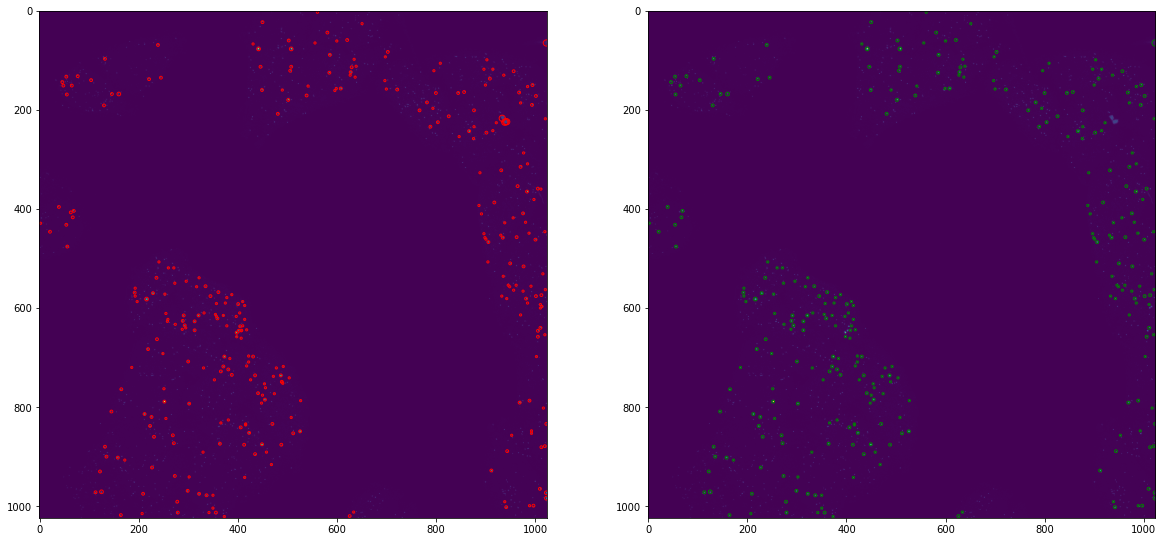

In [15]:
blobs = numpy.array(
    [list(map(s.model.params.__getitem__, ['center_x', 'center_y', 'center_z', 'width_x'])) for s in
     im.spots])

pruned_blobs = prune_blobs(blobs, overlap=0.)

f, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax = ax.ravel()
ax[0].imshow(numpy.amax(im.image_raw, 2))
for p in im.spots:
    ax[0].add_patch(
        plt.Circle((p.coordinates[1], p.coordinates[0]), 2 * p.model.params['width_x'], fill=False, color='r'))
ax[1].imshow(numpy.amax(im.image_raw, 2))
for p in pruned_blobs:
    ax[1].add_patch(
        plt.Circle((p[1], p[0]), 2 * p[3], fill=False, color='g'))
f.show()

/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


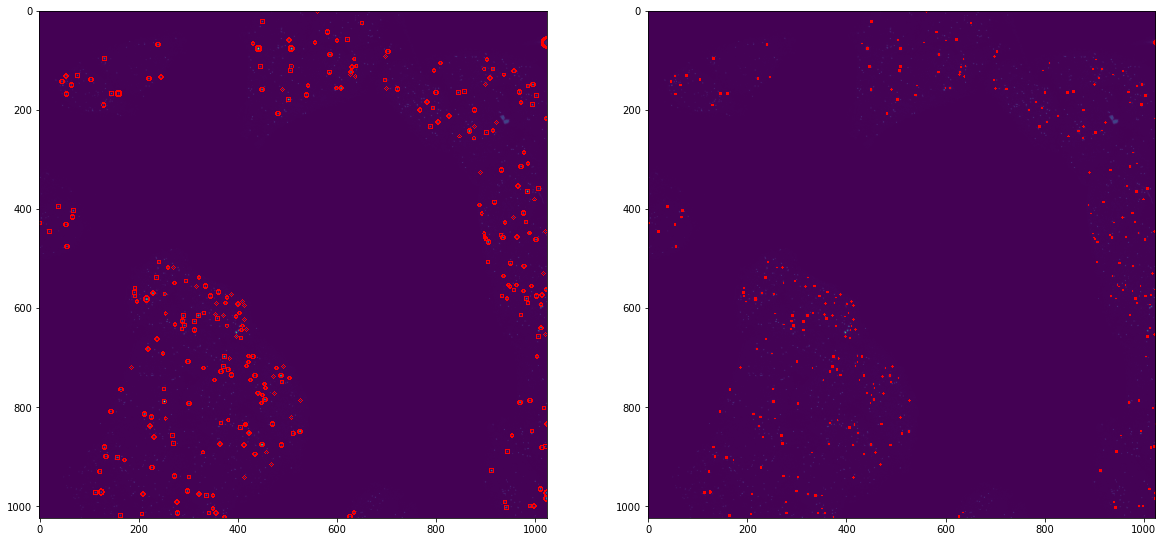

In [9]:
blobs = numpy.array(
    [list(map(s.model.params.__getitem__, ['center_x', 'center_y', 'center_z', 'width_x'])) for s in
     im.spots])

pruned_blobs = prune_blobs(blobs, overlap=0.)

# Compute background
loop = pruned_blobs

shape = im.image_raw.shape
spot_array = [numpy.array([]), ] * 3
noise_array = [numpy.array([]), ] * 3
for s in loop:
    spot = ellipse_in_shape(shape, s[:3],
                            (2 * s[-1], 2 * s[-1], 2 * s[-1] * shape[2] / max(shape[0], shape[1])))
    vicinity = ellipse_in_shape(shape, s[:3],
                                (4 * s[-1], 4 * s[-1], 4 * s[-1] * shape[2] / max(shape[0], shape[1])))
    noise = filter(lambda p: p not in zip(*spot), zip(*vicinity))
    spot_array = [numpy.append(a, sp) for (a, sp) in zip(spot, spot_array)]
    noise_array = [numpy.append(a, sp) for (a, sp) in zip(zip(*noise), noise_array)]

fond = numpy.zeros(im.image_raw.shape)
fond[tuple(map(lambda m: m.astype(int), spot_array))] = 1
fond[tuple(map(lambda m: m.astype(int), noise_array))] = -1

masked_spot = numpy.ma.masked_where(fond != 1, fond)
masked_noise = numpy.ma.masked_where(fond != -1, fond)

f, ax = plt.subplots(ncols=2, figsize=(20, 10))
cmap = colors.ListedColormap(['red'])
ax = ax.ravel()
ax[0].imshow(numpy.amax(im.image_raw, 2))
ax[0].imshow(numpy.amax(masked_noise, 2), cmap=cmap)
ax[1].imshow(numpy.amax(im.image_raw, 2))
ax[1].imshow(numpy.amax(masked_spot, 2), cmap=cmap)
f.show()


In [7]:
print(im.SNR)

1.2


Treating /Users/remydubois/Desktop/Remy/_REMY/Opera_Conf/3D/B09_DYNC1H1/r02c09f02-ch1sk1fk1fl1.tif



Detecting...

1355 spots detected.

Fitting...

fit.


/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


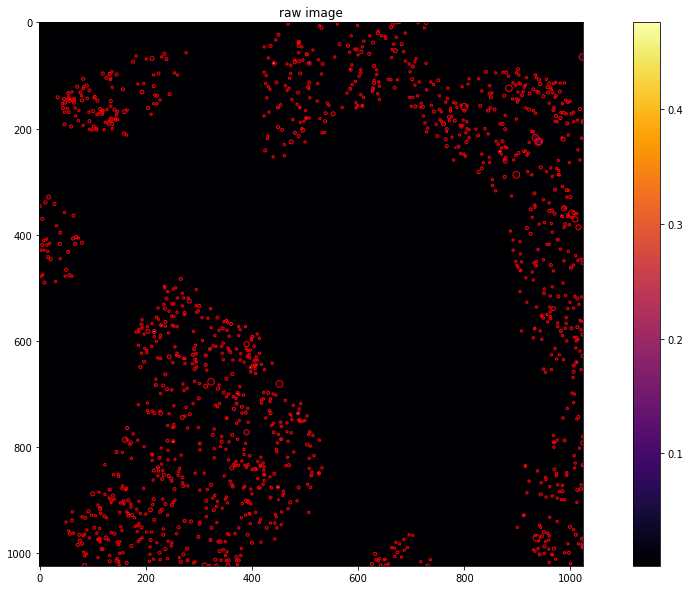

In [29]:
% matplotlib inline

from Image.image import *
from joblib import Parallel, delayed

def describe(p):
    print('Treating %s' % p)
    im = FQimage(verbose=1)
    im.load(p)
    im.detect_and_fit(threshold_percentile=0.0)
    im.show_spots()
    # im.compute_snr()
    return im.SNR


im_paths = ['/Users/remydubois/Desktop/Remy/_REMY/Opera_Conf/3D/B09_DYNC1H1/r02c09f02-ch1sk1fk1fl1.tif',
            '/Users/remydubois/Desktop/Remy/_REMY/Opera_Conf/3D/B09_DYNC1H1/r02c09f03-ch1sk1fk1fl1.tif',
            '/Users/remydubois/Desktop/Remy/_REMY/Opera_Conf/3D/B09_DYNC1H1/r02c09f04-ch1sk1fk1fl1.tif',
            '/Users/remydubois/Desktop/Remy/_REMY/Opera_WF/3D/B09_DYNC1H1/r02c09f01-ch1sk1fk1fl1.tif',
            '/Users/remydubois/Desktop/Remy/_REMY/Opera_WF/3D/B09_DYNC1H1/r02c09f02-ch1sk1fk1fl1.tif',
            '/Users/remydubois/Desktop/Remy/_REMY/Opera_WF/3D/B09_DYNC1H1/r02c09f03-ch1sk1fk1fl1.tif',
            '/Users/remydubois/Desktop/Remy/_REMY/hilo_tournant/Stacks/B09_DYNC1H1/171208_00_w1TIRF-561.TIF',
            '/Users/remydubois/Desktop/Remy/_REMY/hilo_tournant/Stacks/B09_DYNC1H1/171208_01_w1TIRF-561.TIF',
            '/Users/remydubois/Desktop/Remy/_REMY/hilo_tournant/Stacks/B09_DYNC1H1/171208_02_w1TIRF-561.TIF'
            ]


# out = Parallel(n_jobs=4, verbose=11)(delayed(describe)(i) for i in im_paths)
describe(im_paths[0])

Treating /Users/remydubois/Desktop/Remy/_REMY/Opera_WF/3D/B09_DYNC1H1/r02c09f01-ch1sk1fk1fl1.tif



Detecting...

31 spots detected.

Fitting...

fit.


/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


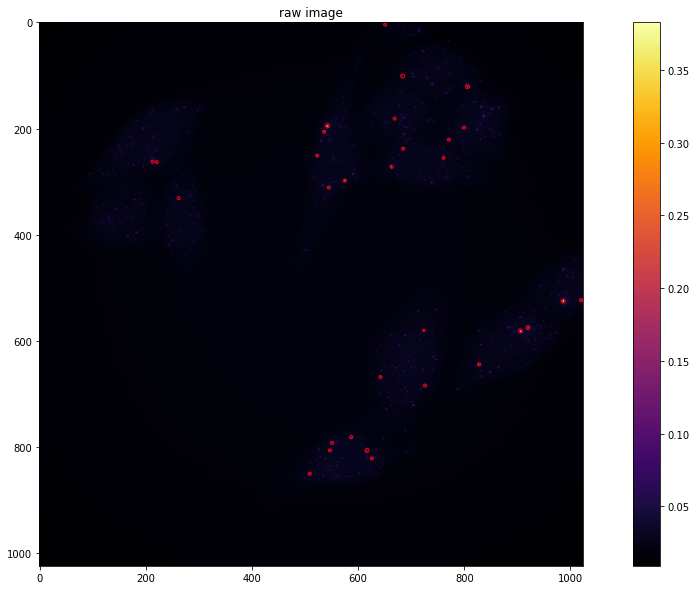

In [30]:
describe(im_paths[3])

Treating /Users/remydubois/Desktop/Remy/_REMY/hilo_tournant/Stacks/B09_DYNC1H1/171208_01_w1TIRF-561.TIF


/Users/remydubois/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))



Detecting...

/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


IndexError: too many indices for array

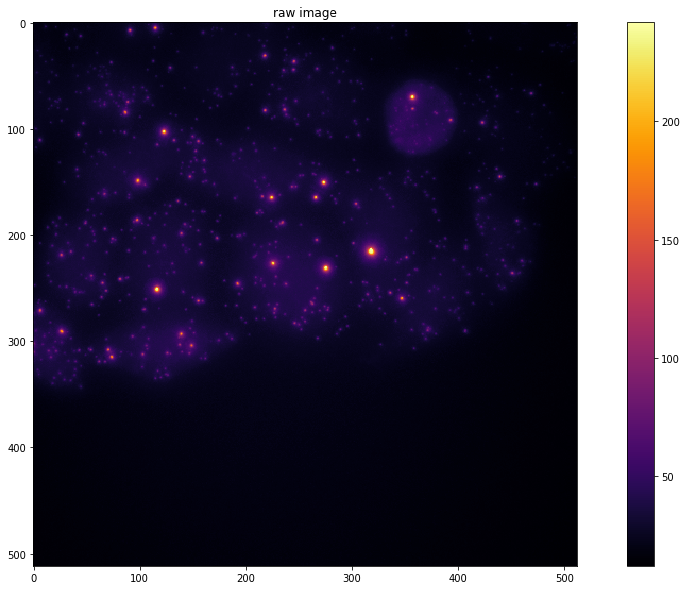

In [ ]:
describe('/Users/remydubois/Desktop/Remy/_REMY/hilo_tournant/Stacks/B09_DYNC1H1/171208_01_w1TIRF-561.TIF')

/Users/remydubois/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


uint8

Detecting...

/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


12.883064985275269


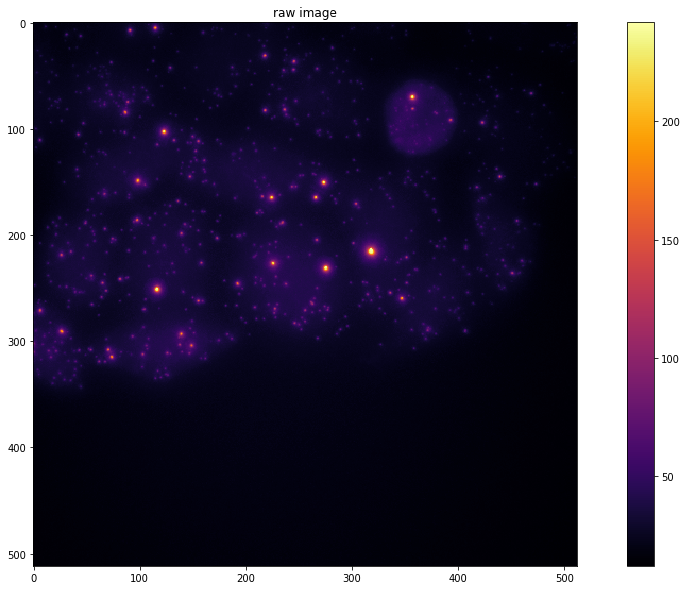

In [9]:
%matplotlib inline
from Image.image import *

op_path = '/Users/remydubois/Desktop/Remy/_REMY/Opera_WF/3D/B09_DYNC1H1/r02c09f01-ch1sk1fk1fl1.tif'
hilo_path = '/Users/remydubois/Desktop/Remy/_REMY/hilo_tournant/Stacks/B09_DYNC1H1/171208_01_w1TIRF-561.TIF'
s = time.time()
im = FQimage()
im.load(hilo_path)
print(im.image_raw.dtype)
im.detect_and_fit(threshold=numpy.percentile(im.image_raw, 90))
im.show_spots()
print(time.time()-s)

In [47]:
% matplotlib inline

from FishAnalyser import *

feed_func = lambda x, y, z: Gaussian3D(200, 300, 25, 150, 3, 3, 3)(x, y, z) + \
                            Gaussian3D(300, 300, 25, 50, 4, 4, 4)(x, y, z) + \
                            Gaussian3D(150, 200, 25, 90, 2.5, 2.5, 2.5)(x, y, z) + \
                            Gaussian3D(50, 250, 25, 30, 3.5, 3.5, 3.5)(x, y, z) + \
                            Gaussian3D(300, 110, 25, 180, 1.5, 1.5, 1.5)(x, y, z) + \
                            Gaussian3D(450, 100, 25, 120, 3.5, 3.5, 3.5)(x, y, z)


def inspect(loc, scale, distrib=numpy.random.normal):
    snr = []
    data = numpy.fromfunction(feed_func, shape=(512, 512, 35)).astype(numpy.uint8)
    noise = distrib(loc=loc, scale=scale, size=(512, 512, 35))
    noise = numpy.uint8((noise - noise.min())*int(noise.max())/(noise.max() - noise.min()))
    im = FQimage(data=data+noise, verbose=0)
    im.image_raw[0, 0, :] = 0
    im.detect_and_fit(threshold=0., num_peaks=6, return_profile=False)
    # plt.plot(list(range(254)), heights)
    # im.show_spots()
    for _ in range(10):
        data = numpy.fromfunction(feed_func, shape=(512, 512, 35)).astype(numpy.uint8)
        noise = distrib(loc=loc, scale=scale, size=(512, 512, 35))
        noise = numpy.uint8((noise - noise.min())*int(noise.max())/(noise.max() - noise.min()))
        im.image_raw = data + noise
        im.compute_snr()
        snr.append(im.SNR)
    return numpy.mean(snr)
   
    
snrs = Parallel(n_jobs=4)(delayed(inspect)(m, m / 4, numpy.random.normal) for m in range(0, 40, 4))

/Users/remydubois/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


/Users/remydubois/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


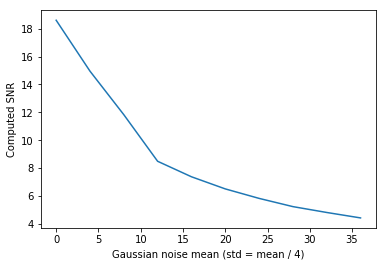

In [48]:
f, ax = plt.subplots()
ax.plot(list(range(0, 40, 4)), snrs)
ax.set_ylabel('Computed SNR')
ax.set_xlabel('Gaussian noise mean (std = mean / 4)')
f.show()


In [64]:
feed_func = lambda x, y, z: numpy.sum([Gaussian3D(*[numpy.random.randint(512),]*3 ,  numpy.random.randint(200), *[numpy.random.uniform(2, 4, size=1)[0], ] * 3)(x, y, z) for _ in range(40)])

def inspect(num_peaks, distrib=numpy.random.normal):
    data = numpy.fromfunction(feed_func, shape=(512, 512, 35)).astype(numpy.uint8)
    noise = distrib(loc=12, scale=3, size=(512, 512, 35))
    noise = numpy.uint8((noise - noise.min())*int(noise.max())/(noise.max() - noise.min()))
    im = FQimage(data=data+noise, verbose=0)
    im.image_raw[0, 0, :] = 0
    im.detect_and_fit(threshold=0., num_peaks=num_peaks, return_profile=False)
    im.compute_snr()
    return im.SNR
   
    
snrs = Parallel(n_jobs=4)(delayed(inspect)(n) for n in range(40, 200, 10))

/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


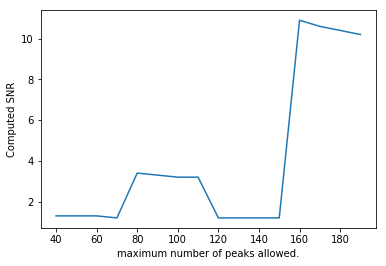

In [66]:
f, ax = plt.subplots()
ax.plot(list(range(40, 200, 10)), snrs)
ax.set_ylabel('Computed SNR')
ax.set_xlabel('maximum number of peaks allowed.')
f.show()


/Users/remydubois/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


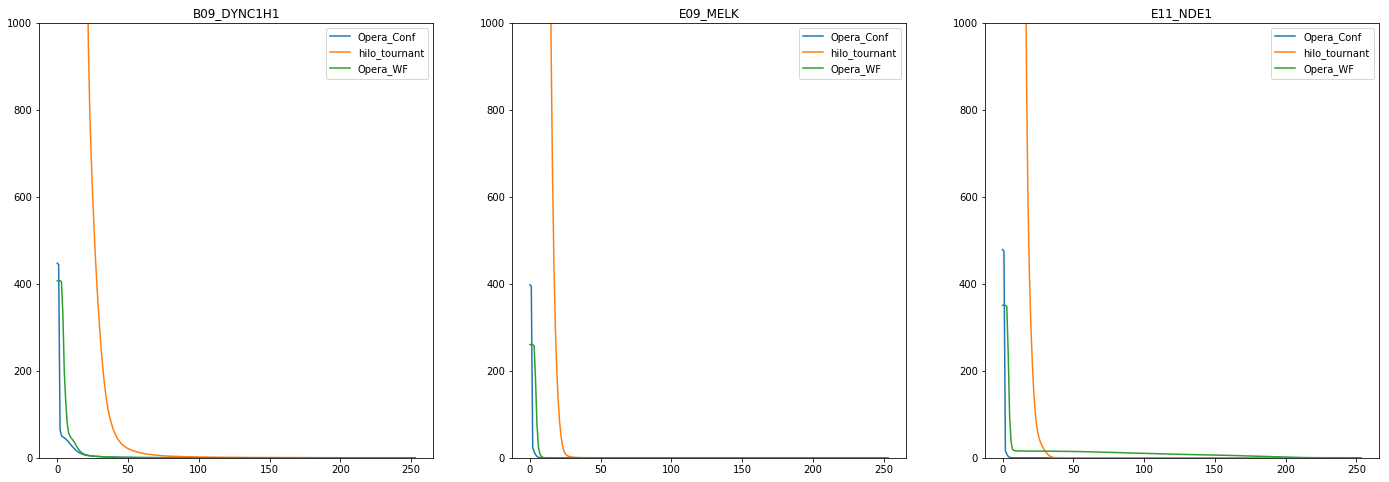

In [18]:
from FishAnalyser import *

df = pandas.read_pickle('/Users/remydubois/Desktop/Remy/_REMY/spot_detection/calibration/data_calibration.pkl')
# print(sorted(df['#ARN'].unique()))
df['arn_per_cell'] = [a / b if b > 0 else 0 for a, b in zip(df['#ARN'], df['#Cells'])]

f, (a0, a1, a2) = plt.subplots(ncols=3, figsize=(24, 8))

for gene, a in zip(df.gene.unique(), [a0, a1, a2]):
    ex = df[df.gene == gene][['microscope', 'gene', 'arn_per_cell', 'threshold']]
    for micro in ex.microscope.unique():
        exex = ex[ex.microscope == micro][['arn_per_cell', 'threshold']]
        a.plot(exex.threshold.unique(), exex.groupby('threshold').mean(), label=micro)
    a.legend()
    # a.set_yscale('log')
    a.set_ylim([0, 1.0e2])
    a.set_title(gene)
f.show()
